In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter

In [9]:
from wrangler import get_filepath

In [10]:
file = get_filepath('01._Expenditure_-_DDO_and_SOE_Wise.csv')
df = pd.read_csv(file, index_col='YEAR', parse_dates=True)

In [11]:
df = df.drop('Unnamed: 0', axis=1)
df['SOEDESC'] = df['SOEDESC'].astype('category')

In [12]:
k8_df = df['2008']
totals_df = k8_df[k8_df['SOEDESC'] == 'Total']

In [13]:
def format_ytick(tick_val):
    if tick_val < 1000:
        return tick_val
    elif tick_val < 10**6:
        return '{}k'.format(int(float(tick_val)/1000))
    elif tick_val < 10**9:
        return '{}M'.format(int(float(tick_val)/10**6))
    else:
        return '{}B'.format(int(float(tick_val)/10**9))

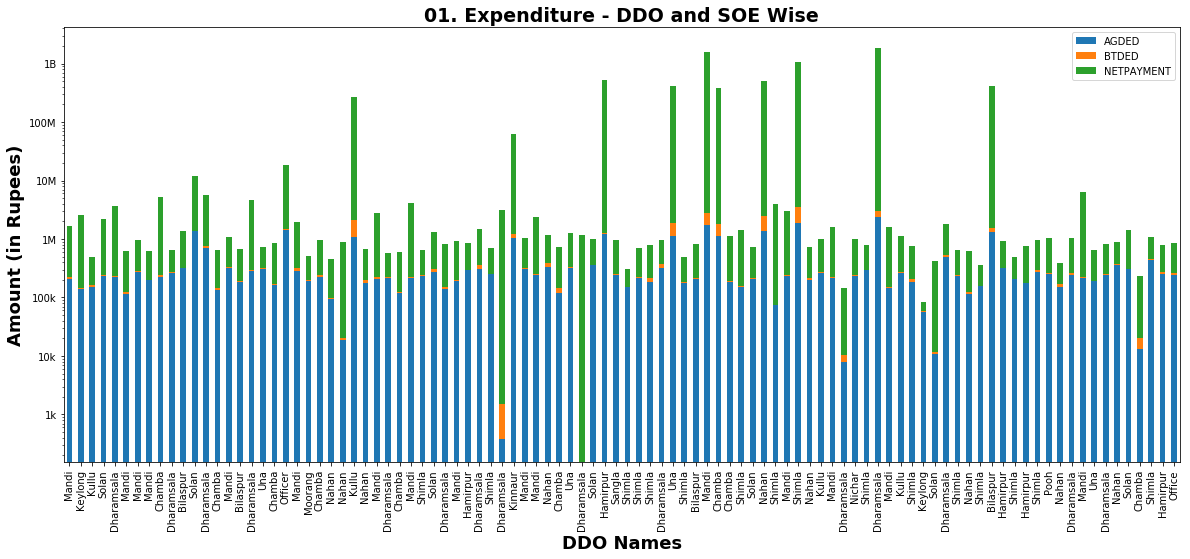

In [14]:
plot_title = ' '.join(file.split('/')[-1].split('_')).split('.csv')[0]

# create the bar plot with the different sections of amount on yaxis and gross on x.
# it's a stacked bar.
ax = totals_df.plot(kind='bar', x='DDODESC', y=['AGDED', 'BTDED', 'NETPAYMENT'],
                    stacked=True, figsize=(20,8), linewidth=5)

plt.title(plot_title, fontsize=19, fontweight='bold')

# the difference of values is huge and that supress all other columns in fron of the largest
# so normalize the y axis with log.
plt.yscale('log')

# set ticks by extracting the DDO names from DDODESC string.
ax.set_xticklabels([x.get_text().split()[-1].title() for x in ax.get_xticklabels()], fontsize=10)

ax.set_xlabel('DDO Names', fontsize=18, fontweight='bold')

# set formatter for axis so that we can apply formatter properties
ax.yaxis.set_major_formatter(ScalarFormatter())
# set scientific notation to false, because after scaling y axis with log we have exponential ticks on y axis.
ax.get_yaxis().get_major_formatter().set_scientific(False)

# format yticks appropriately to show amounts in thousands.
ax.set_yticklabels(list(map(format_ytick, ax.get_yticks())))

ax.set_ylabel('Amount (in Rupees)', fontsize=18, fontweight='bold')

plt.show()